## Faz o clustering (agrupamento) das reclamações conforme as categorias escolhidas

In [1]:
# importa bibliotecas
import pandas as pd
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# carrega os dados do arquivo csv transformado
DADOS = 'arquivos_tratados/reclamações.csv'
df = pd.read_csv(DADOS)
df.head(3)

,rco,rn,rne,rs,rse,sf,sm,so,ate20,21a30,31a40,41a50,51a60,61a70,70+
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


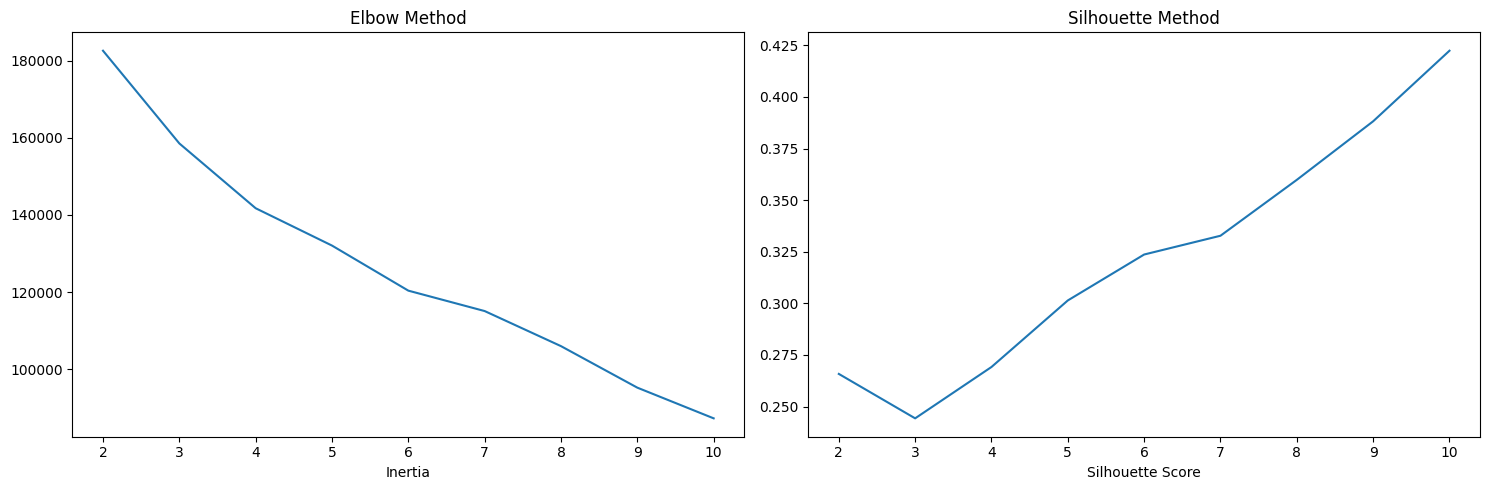

In [3]:
# gera os gráficos para definir a quantidade de clusters a serem gerados usando os métodos
# do COTOVELO e da SILHUETA - aqui definido que o melhor cluster terá tamanho de 6
from funcoes_auxiliares import graficos_elbow_silhouette

graficos_elbow_silhouette(df)

In [4]:
# gera os clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
kmeans.fit(df)
kmeans.labels_

array([2, 4, 3, ..., 2, 3, 2])

In [5]:
# salva o modelo dos clusters em arquivo .pkl
import joblib
joblib.dump(kmeans, "modelos/kmeans.pkl")

['modelos/kmeans.pkl']

In [6]:
# cria a coluna de cluster no dataframe de origem que forneceu os dados para geração
df_clustered = df.copy()
df_clustered["cluster"] = kmeans.labels_

df_clustered.head()

,rco,rn,rne,rs,rse,sf,sm,so,ate20,21a30,31a40,41a50,51a60,61a70,70+,cluster
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4


In [7]:
# salva o arquivo clusterizado
df_clustered.to_csv("arquivos_tratados/df_clustered.csv", index=False)